In [30]:
#accessing Naver API with keyword: 손흥민
import os
import sys
import ast
import time
import urllib.request
import nltk

from bs4 import BeautifulSoup
from konlpy.tag import Twitter; t=Twitter()
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

/Users/jonghobaeck/miniconda3/lib/python3.7/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [2]:
def get_article_url(keyword):
    client_id = "clintID"
    client_secret = "key"
    encText = urllib.parse.quote(keyword)
    url = "https://openapi.naver.com/v1/search/news?query=" + encText + "&display=100" # json 결과
    # url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        response_string = response_body.decode('utf-8')
        response_dict = ast.literal_eval(response_string)
    else:
        print("Error Code:" + rescode)
    return response_dict

In [3]:
response_dict = get_article_url('손흥민')

In [4]:
def get_valid_url(response_dict):
    article_list = []
    naver_sports_url = 'http://sports.news.naver.com'
    news_articles = response_dict['items']
    
    for element in news_articles:
        if element['link'][:28] == naver_sports_url:
            article_list.append(element['link'])
    
    return article_list

In [5]:
article_list = get_valid_url(response_dict)

In [6]:
article_list

['http://sports.news.naver.com/wfootball/news/read.nhn?oid=052&aid=0001250101',
 'http://sports.news.naver.com/wfootball/news/read.nhn?oid=011&aid=0003500117',
 'http://sports.news.naver.com/kfootball/news/read.nhn?oid=477&aid=0000161287',
 'http://sports.news.naver.com/wfootball/news/read.nhn?oid=016&aid=0001495727',
 'http://sports.news.naver.com/kfootball/news/read.nhn?oid=396&aid=0000502618',
 'http://sports.news.naver.com/wfootball/news/read.nhn?oid=139&aid=0002103948',
 'http://sports.news.naver.com/wfootball/news/read.nhn?oid=076&aid=0003376649',
 'http://sports.news.naver.com/wfootball/news/read.nhn?oid=421&aid=0003819954',
 'http://sports.news.naver.com/wfootball/news/read.nhn?oid=052&aid=0001250055',
 'http://sports.news.naver.com/wfootball/news/read.nhn?oid=022&aid=0003338285',
 'http://sports.news.naver.com/wfootball/news/read.nhn?oid=117&aid=0003171031',
 'http://sports.news.naver.com/wfootball/news/read.nhn?oid=214&aid=0000921754',
 'http://sports.news.naver.com/wfootball

In [7]:
def get_article_text(article_list):
    result_text = ''
    for each in article_list:
        html = urllib.request.urlopen(each)
        soup = BeautifulSoup(html, 'html.parser')
        text = soup.find(attrs={'id':'newsEndContents'}).get_text()
        text = text.replace('\t', '').replace('\n', '').strip()
        result_text = result_text + text + " "
        
        time.sleep(5)
        
        
    return result_text

In [8]:
article_text = get_article_text(article_list)

In [9]:
article_text

'손흥민이 프리미어리그 공식 SNS 메인 커버를 단독으로 장식하며 높아진 위상을 실감하게 했다.5일, 프리미어리그 공식 페이스북은 커버로 손흥민의 뉴캐슬전 사진을 선정했다. 프리미어리그 공식 페이스북 페이지는 전 세계 4,200만 명이 넘는 축구 팬을 구독자로 두고 있는 대표적인 축구 페이지다.손흥민의 단독 사진이 커버를 장식했다는 건 현지에서도 10경기에서 9골을 기록하는 등 맹활약을 펼치는 손흥민을 프리미어리그의 대표 선수 가운데 한 명으로 인식하고 있다는 뜻이다.손흥민은 아시안컵에서 복귀한 뒤 지난달 31일 왓포드전과 2일 뉴캐슬전에 연속으로 선발 출장해 팀을 위기에서 구해내는 골을 기록했다. 해리 케인과 델레 알리의 부재 속에서도 토트넘이 리그 연승을 기록하자 손흥민을 바라보는 현지의 시선도 달라졌다. 영국 BBC 축구프로그램 MOTD에서 진행자들이 손흥민을 \'올해의 선수\' 후보로 언급하는가 하면 현지 기자들의 손흥민에 대한 특집 기사도 줄이어 올라오고 있다.활약에 힘입어 손흥민은 영국 스카이스포츠가 선정하는 2018-19 잉글리시 프리미어리그 파워랭킹에서 지난 라운드보다 30계단이나 상승한 7위를 기록했다. 6일 현재 토트넘은 1위 리버풀과 승점 5점 차이, 2위 맨시티와는 2점 차이로 3위를 달리고 있다. 만약 손흥민이 기록한 두 경기 연속골이 아니었다면 토트넘은 승점 5점 이상을 잃고 우승 경쟁에서 멀어져 챔피언스리그 진출 기준인 4위 수성을 목표로 해야 했을지도 모른다.토트넘의 다음 경기는 레스터시티의 프리미어리그 26라운드로 우리 시간으로 오는 10일 오후 10시 30분에 킥오프한다. 손흥민의 선발 출전이 확실한 가운데 연속 골 기록을 이어갈 수 있을지 주목된다.YTN PLUS(mobilepd@ytnplus.co.kr) ▶ 24시간 실시간 뉴스 생방송 보기  ▶ YTN 네이버 채널 구독하고 백화점 상품권 받자! [저작권자(c) YTN & YTN PLUS 무단전재 및 재배포 금지]기사제공 YTN 공백에도 최근 EPL 12경기 10골英언론 "첼

In [32]:
def get_common_words(article_text, keyword):
    tokens_ko = t.morphs(article_text)
    
    stop_words = ['.', '에서', '가','요','있다','했다','을','수','에','를','이','도','으로'
                          '좋','25','는','로','으로','1','것','은','다','니다','대','들',
                          '데','..','의','때','겠','고','게','네요','한','일','할',
                          '2','?','06','주','려고','인데','거','좀','는데',
                          '있다는','20','뭐','있는','다면','했','주려',
                          '지','인','못','후','중','줄','6','과','가요','....','보이','네',
                          '무지', '(', ')', ',', "'", '벤', '두', '더', '받고', '3',
                          '▶', ']', '[','-','전','재','까지','약','적','위','료','=','등',
                          '이번','됐다','와','그','하고','하는','지난', '한다', '현지', '해', '기자', '서',
                          '이자', '가운데', '연합뉴스', '][', '헤럴드경제', '모바일', '위로', '즌', '보다', '올렸다', '터',
                          '트리', '며', '임', '에도', '위서', '끌어', '올렸다', '이어', '),', '(,','.onlinenews@heraldcorp.com',
                          '네이버','ⓒ','Copyrights','&','heraldbiz.com','"','이다','무단','배포','금지','뉴스','만','‘','’',
                          '“','”','영','기사','제공','및','입','올','에게','\xa0','보도','하며','속','10','점','하지만','에는',
                           '이라고']

    tokens_ko = [word for word in tokens_ko if word not in stop_words]
    ko = nltk.Text(tokens_ko, name=keyword)
    
    return ko

In [33]:
ko = get_common_words(article_text, '손흥민')

In [28]:
def visualize_common_words(tokens):
    data = tokens.vocab().most_common(100)
    
    wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                          relative_scaling = 0.5,
                          background_color='white').generate_from_frequencies(dict(data))

    plt.figure(figsize=(16,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

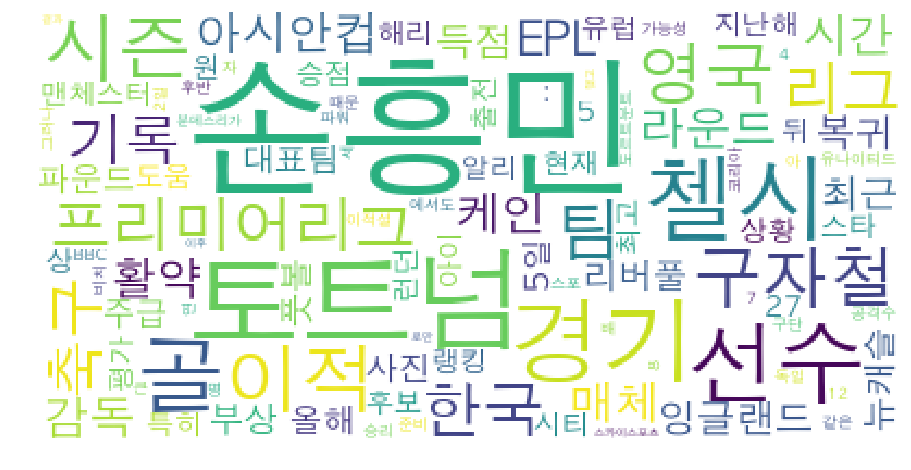

In [34]:
visualize_common_words(ko)